## Task 51

- “This data set contains statistics, in arrests per 100,000 residents,
for assault, murder, and rape in each of the 50 US states in 1973. Also given is the
percent of the population living in urban areas.”

- **(1) Use the dataset UsArrests.csv included in this folder to generate a similar
in-depth PCA report of the data.** 
    - **Explore as much as you can, motivate the
pre-processing steps you take, and interpret the outcomes of any analyses.**

- **(2) You are also required to do an application of two clustering techniques and
an analysis of the clusters they generate.** 
    - **Try and see if you can find anything
common within each cluster that has been found.**

- **Push all the work that you have generated for this project to GitHub.**
 - [Task 53]()

- **Food for thought:**
- I would like to encourage you to comment your analysis more by adding any inferences/conclusions and hypotheses that you develop while conducting the analysis. 
    - Coupled with that, adding comments as to <u> why the visualisations you have generated are necessary for the analysis will add to the comprehensiveness of the task you complete</u>.


- ### Generate a **'similar'** indepth PCA report
 - Similar to the PCA report presented in the task.

In [193]:
import pandas as pd
import numpy as np

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

import ast, json

from word2number import w2n

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, silhouette_score
from sklearn.model_selection import train_test_split

# For KNN
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import NearestNeighbors

from sklearn import preprocessing

from sklearn.cluster import KMeans

from sklearn.datasets import load_iris

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, silhouette_score

from sklearn.cluster import KMeans

In [195]:
# Does this need to be indexed ??? If specified in default.
data = pd.read_csv("UsArrests.csv",index_col='City') #,index_col='Country')
data.head(10)

,Murder,Assault,UrbanPop,Rape
City,,,,
Alabama,13.200,236,58,21.200
Alaska,10.000,263,48,44.500
Arizona,8.100,294,80,31.000
Arkansas,8.800,190,50,19.500
California,9.000,276,91,40.600
Colorado,7.900,204,78,38.700
Connecticut,3.300,110,77,11.100
Delaware,5.900,238,72,15.800
Florida,15.400,335,80,31.900


In [196]:
print('Number of cases: {} Number of features: {}'.format(data.shape[0],data.shape[1]))

Number of cases: 50 Number of features: 4


In [197]:
data.shape #(50, 5)

(50, 4)

- We summarise the statistical properties here:
 - 'Arrests' per 100,000 residents. 

In [198]:
#The describe function give us insight into the statistical properties of the columns
stats = data.describe()
stats
selected_stats = stats.loc[["mean","std","min","max"]].transpose() #select relevant rows
selected_stats

,mean,std,min,max
Murder,7.788,4.356,0.800,17.400
Assault,170.760,83.338,45.000,337.000
UrbanPop,65.540,14.475,32.000,91.000
Rape,21.232,9.366,7.300,46.000


In [199]:
# Load data

print('Data:')
print(data.head(), end='\n\n')

# Preprocess data

# check if there are missing values
print(data.isnull().sum(), end='\n\n')

# check if there are non-numerical features
print(data.info())

Data:
            Murder  Assault  UrbanPop   Rape
City                                        
Alabama     13.200      236        58 21.200
Alaska      10.000      263        48 44.500
Arizona      8.100      294        80 31.000
Arkansas     8.800      190        50 19.500
California   9.000      276        91 40.600

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB
None


- #### Preprocessing

- There is no missing data. 
    - Let's inspect that data is coded correctly to insure missing data is coded as something other than NaN
        - All inputs are either a float64 or int64
            - There doesn't seem to be any zero's or nonsense numbers (such as negative numbers in the data).

In [200]:
# Examine types
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [201]:
#data['Murder']
#data['Assault']
#data['UrbanPop']
#data['Rape']

In [252]:
# What data types are our variables
data.dtypes

Murder      float64
Assault       int64
UrbanPop      int64
Rape        float64
dtype: object

In [204]:
data.head(10)
#auto_df[21:40]

,Murder,Assault,UrbanPop,Rape
City,,,,
Alabama,13.200,236,58,21.200
Alaska,10.000,263,48,44.500
Arizona,8.100,294,80,31.000
Arkansas,8.800,190,50,19.500
California,9.000,276,91,40.600
Colorado,7.900,204,78,38.700
Connecticut,3.300,110,77,11.100
Delaware,5.900,238,72,15.800
Florida,15.400,335,80,31.900


In [205]:
# Check for missing data entries

missing = data.isnull().sum()
relevant_missing = pd.DataFrame(missing, columns=["missing"])
relevant_missing

,missing
Murder,0
Assault,0
UrbanPop,0
Rape,0


- **Each row is indexed as a city**

In [206]:
# data.index -> Not data.row or data.rows
data.index

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='City')

In [207]:
# This won't work.
#data['City']#.values #.shape #(50,)
#type(data['City'].values) # With values -> It is now an np.array #numpy.ndarray

- To visualise the distribution of the observations for each feature, we plot a histogram using Pandas's ```.hist()``` function:

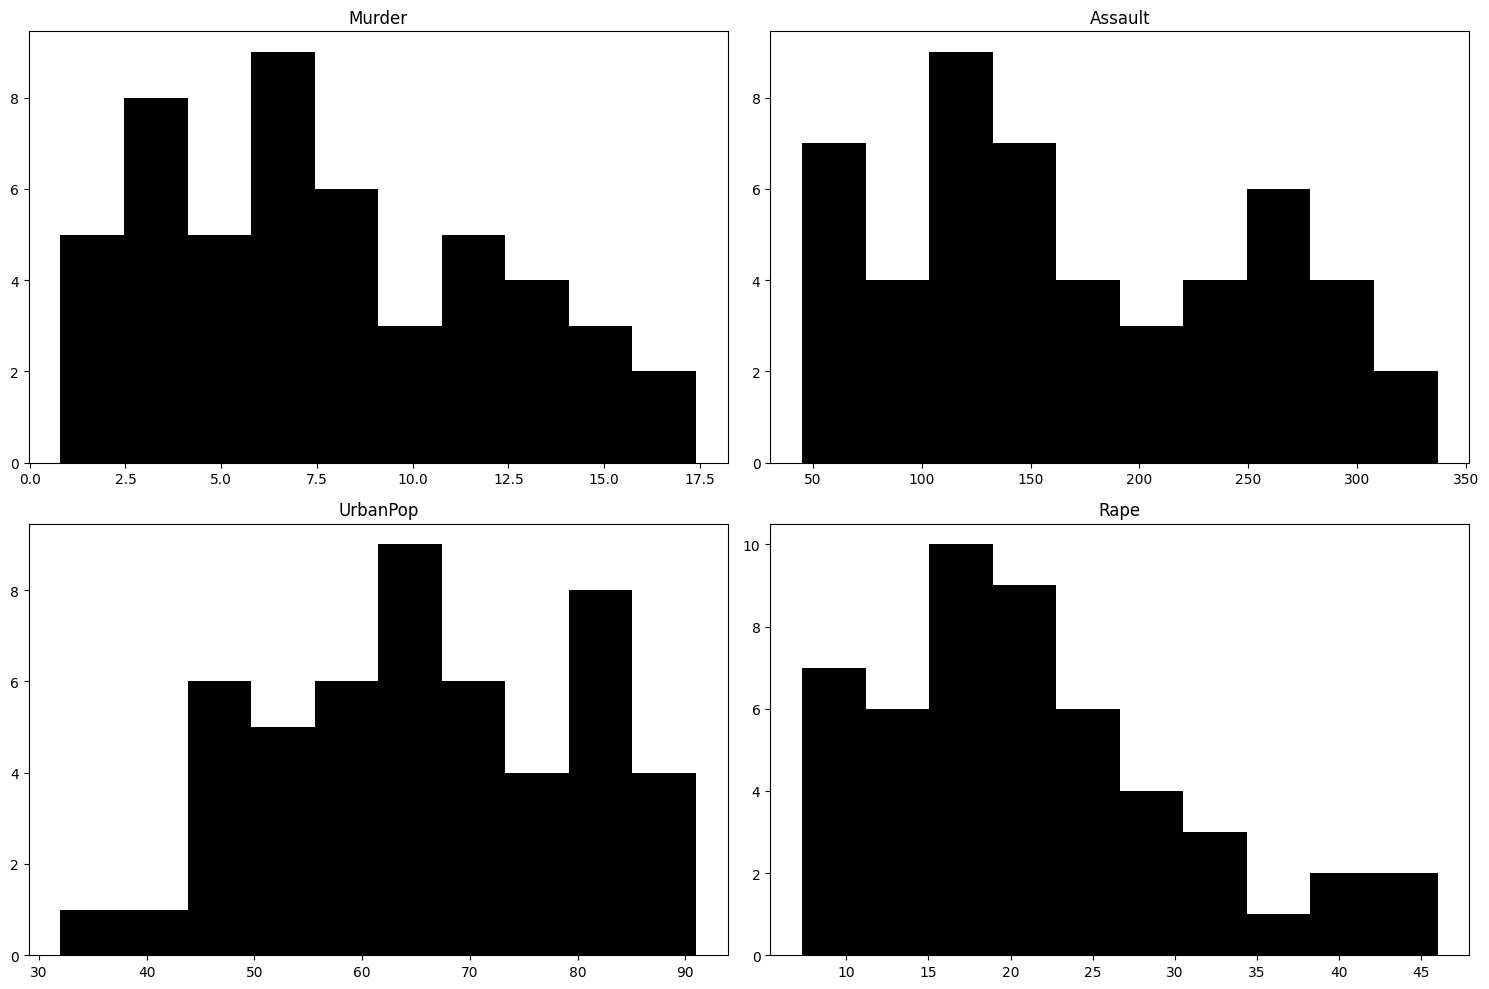

In [208]:
# Plot histograms
histograms = data.hist(color='black', grid=False, figsize=(15, 10)) #This can also be done for each column individually by calling hist on that column
plt.tight_layout()
plt.show()

# Do we need to scale assault.

- Histograms:
 - (1) Assualt seems to be bi-modal
 - (2) Rape seems to be skewed to the right
 - (3) Murder has a tail to the right
 - (4) UrbanPop does not have a normal distribution

- We can compile the tabular information we have so far into a single dataframe:

In [209]:
# Create summary table
frames = [relevant_missing,selected_stats]
summary = pd.concat(frames, axis=1)
summary.rename(columns = {0:"missing"}, inplace = True)
summary.to_csv('summary.csv', index=True) 
summary


,missing,mean,std,min,max
Murder,0,7.788,4.356,0.800,17.400
Assault,0,170.760,83.338,45.000,337.000
UrbanPop,0,65.540,14.475,32.000,91.000
Rape,0,21.232,9.366,7.300,46.000


- At first glance, the Assault variable stands out as having a mean and standard deviation which is dramatically higher than the other variables (170.76 > 65.540 [Which is the second closest]).
   - UrbanPop is a mean of percentages/proportions and so will be restricted to be between 0-100. 
    - Most of the other variables are not percentages or ratios but counts per 1000 people and so can excide 100.
        - E.g: Assualt having a mean of 170.76.
    - <u>This indicates that scaling the data will be useful to keep the analysis between the four variables interpretable (3 counts per 100,000 and one percentage) and not to allow UrbanPop from impacting the analysis disproportionately.</u> 
        - (We need to eventually scale the whole dataset).
- Assualt also has a much higher variation (std) to the rest of the variables (83.338 vs. (2nd place) 14.475).

In [210]:
data.columns # Four columns -> Make for 3 tables, 
#type(data.columns) #pandas.core.indexes.base.Index #No more City

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

- Four columns -> Make for 3 tables when drawing a scatterplot of one variable against the remaining three.

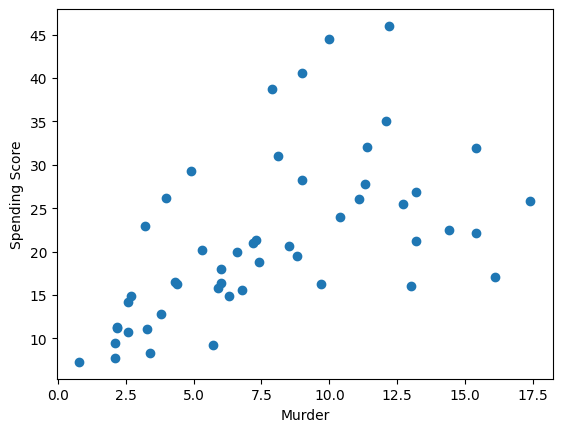

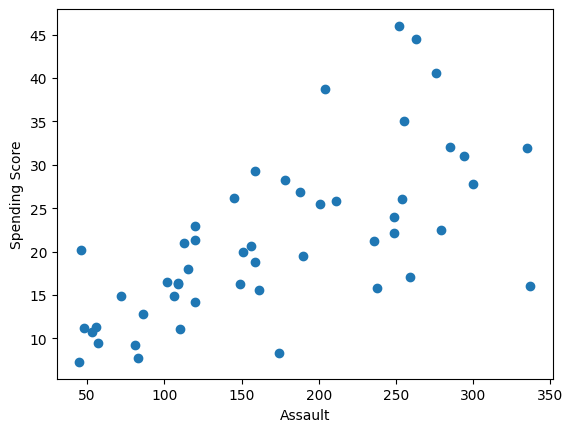

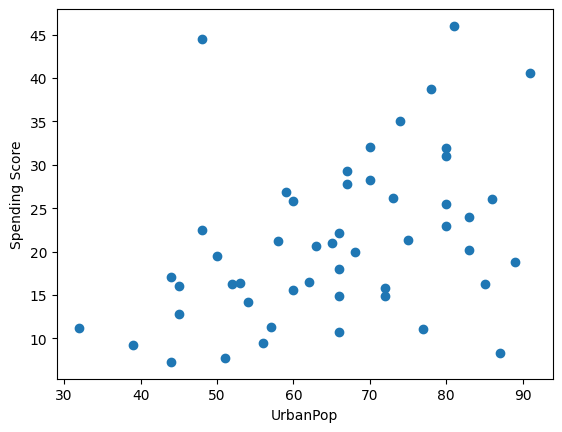

In [211]:
# explore the continuous independent features (Age and Annual Income)

for f in data.columns[0:-1]:
  plt.scatter(data[f], data['Rape'])
  plt.xlabel(f)
  plt.ylabel('Spending Score')
  plt.show()

## Correlation Analysis

- Pandas offers a highly useful function, ``corr``, which allows us to compute correlations between the different columns. 
    - The standard correlation coefficient is the Pearson coefficient. It returns a matrix of values. It is often useful to visualise these as a plot. 
- We use Seaborn's plotting correlation heatmap due to it higher adjustability. 

- We demonstrate the use of Seaborn's heatmap, using a mask to remove the top triangular half of correlations, as these are repeats.

In [212]:
data.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [213]:
data.head()

,Murder,Assault,UrbanPop,Rape
City,,,,
Alabama,13.200,236,58,21.200
Alaska,10.000,263,48,44.500
Arizona,8.100,294,80,31.000
Arkansas,8.800,190,50,19.500
California,9.000,276,91,40.600


In [214]:
#countries = data.index
cities = data.index

corr_df = data.corr()

# labels - defined here!
labels =corr_df.columns


correlations = corr_df.corr()

<AxesSubplot: >

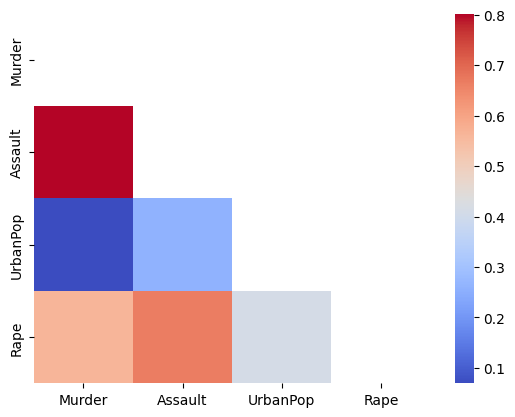

In [215]:
import seaborn as sns
mask_ut=np.triu(np.ones(corr_df.shape)).astype(np.bool_)
sns.heatmap(corr_df, mask=mask_ut, cmap="coolwarm")

- In the plot, there is a linear correlation between strongly correlated variables: those coloured in either dark red or dark blue. Variables which are positively correlated are red: an increase in one corresponds to an increase in the other, while negatively correlated variables are blue: a decrease in one means an increase in the other.

- (1) From the correlation plot, it is evident that Murder has a relatively strong positive correlation to Assualt. Murder can be seen as one step higher to assault or is also classified as an Assault by default. 
    - Murder may have evolved from Assualt, i.e the act of fighting / assaulting could evolve into a more violent form of assault and cause / leave someone with serious injuries that they could die from, equating to murder. 

- (2) Rape and Assualt also have a correaltion. These correlations are intuitive as in order to rape someone, you would either need to assault them firsthand. (Make violent threats). Or possibly use substances to ineberate there victims so that they are passive which may not be classified as a form of assault. This could explain the correlation isn't as strong as between Murder and Assault.
    - Places where there is a high number of assault will beget situations where there are opportunities to rape someone.


- (3) Lastly, Urban Population and Murder seem to have a low correlation (dark blue). Less densely populated areas will consequently have less people around. This could lead to areas where poeple are familar with the other people they live with and make for more static communities, where less aggressions happen in that society. 

- Overall, there are many variables that have strong negative and positive correlations with each other. This makes the data a good candidate for PCA. PCA will be able to reduce variables which encode similar types of differences between cities in a way that requires fewer dimensions.


- This plot shows the same information as above but bigger, and with the correlations imparted on the coloured sqaures. This makes for easier viewing. 

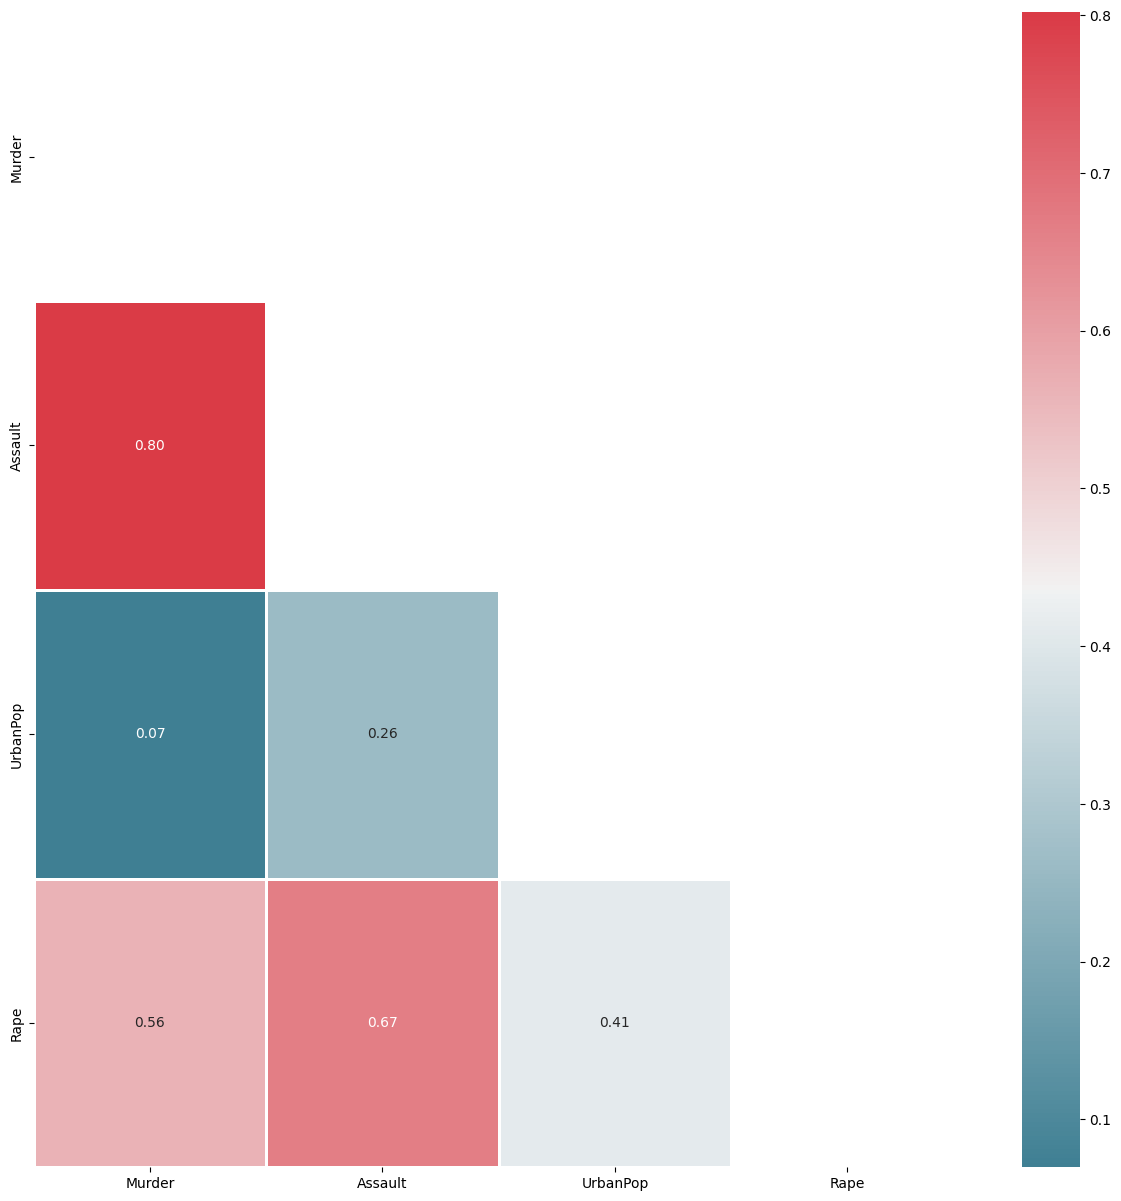

In [216]:
colormap = sns.diverging_palette(220, 10, as_cmap=True)

def corr_heatmap(df):
  # get correlations
  corrs = df.corr()

  # pick appropriate palette for heatmap

  # Plot figsize
  fig, ax = plt.subplots(figsize=(15, 15))

  # to mask mirrored side of heatmap
  dropSelf = np.zeros_like(corrs)
  # Passing in a Numpy Object ??? 
  dropSelf[np.triu_indices_from(dropSelf)] = True

  # Generate Heat Map, with annotations of the correlation strength and 2-decimal floats
  ax = sns.heatmap(corrs, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf, linewidth=2)
  plt.show()

#corr_heatmap(data.drop(["City"],axis=1))
corr_heatmap(data)

- We can now also visually see that the dark blue square for Urban Population and Murder is 0.07, whereas the correlation between Murder and Assault is 0.80.

---
---
---
---

---
---
---
---

## PCA

Principal Components Analysis (PCA) is a method for finding the underlying variables (i.e. principal components) that best differentiate the observations by determining the directions along which your data points are most spread out. Since the determination of the principal components is based on finding the direction that maximises the variance, variables with variance that are much higher than the other variables tend to dominate the analysis purely due to their scale. PCA is a dimensionality reduction techinque which is useful when we have a lot of variables, and need to reduce these. 


### PCA - Analysis
- **(1) Pre-processing steps and (2) Interpret and the outcomes of analyses**

- ### PCA on Unstandardised data.

In [217]:
#X

In [218]:
from sklearn.decomposition import PCA #run again if it does not converge the first time

np.set_printoptions(precision=2)

#X = data.drop(["City"],axis=1).values.squeeze()
X = data.values.squeeze()

pca = PCA()

X_trans = pca.fit_transform(X)

df_pca = pd.DataFrame(X_trans)
df_pca.head()

,0,1,2,3
0,64.802,11.448,-2.495,2.408
1,92.827,17.983,20.127,-4.094
2,124.068,-8.830,-1.687,-4.354
3,18.340,16.704,0.210,-0.521
4,107.423,-22.520,6.746,-2.812


In [219]:
std = df_pca.describe().transpose()["std"]
print(f"Standard deviation: {std.values}")

Standard deviation: [83.73 14.21  6.49  2.48]


In [220]:
print(f"Proportion of Variance Explained: {pca.explained_variance_ratio_}")

Proportion of Variance Explained: [9.66e-01 2.78e-02 5.80e-03 8.49e-04]


- **The first Principal Component explains over 96% of the variation.**
 - With the second explainging 2.78% of the variation. 

In [221]:
print(f"Cumulative Proportion: {np.cumsum(pca.explained_variance_)}")

Cumulative Proportion: [7011.11 7213.11 7255.22 7261.38]


- **Here we create a function to produce a biplot.**

In [222]:
def biplot(score,coeff,labels=None,points=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    fig, ax = plt.subplots()    

    ax.scatter(xs * scalex,ys * scaley,s=5)

    for i in range(0,len(xs)):
        txt = countries[i]
        ax.annotate(txt, (xs[i]* scalex, ys[i]* scaley))

    for i in range(n):
        ax.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    # Only 2-D; So only need the first two PCs.
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()

    # Adapted from: https://ostwalprasad.github.io/machine-learning/PCA-using-python.html

In [223]:
#labels =corr_df.columns

In [224]:
cities = data.index
#biplot(X_trans[:,0:2],np.transpose(pca.components_[0:2, :]),list(labels),list(countries))
#plt.show()
#list(cities) # An actual list.

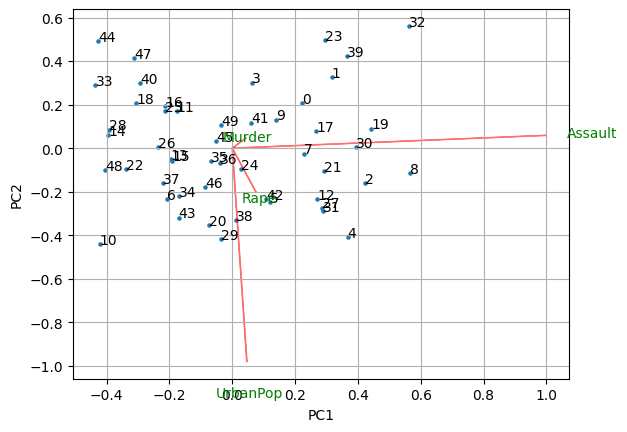

In [225]:
biplot(X_trans[:,0:2],np.transpose(pca.components_[0:2, :]),list(labels),list(cities))
plt.show()

- As there are 50 different cities, writing the names of the cities onto the biplot will not generate a usuable graph. Therefore, create a key for mapping a number to a city. This will help us identiy and further categorise the data points, helping us with our analysis to explain the data.

In [226]:
# Key to read bi-plot
# cities = data.index
zip_dict = {}
for i,city in enumerate(cities):
    zip_dict[city] = i
    #zip_dict.
    #append(city,i)
    #my_dictionary[new_key] = new_value
zip_dict

{'Alabama': 0,
 'Alaska': 1,
 'Arizona': 2,
 'Arkansas': 3,
 'California': 4,
 'Colorado': 5,
 'Connecticut': 6,
 'Delaware': 7,
 'Florida': 8,
 'Georgia': 9,
 'Hawaii': 10,
 'Idaho': 11,
 'Illinois': 12,
 'Indiana': 13,
 'Iowa': 14,
 'Kansas': 15,
 'Kentucky': 16,
 'Louisiana': 17,
 'Maine': 18,
 'Maryland': 19,
 'Massachusetts': 20,
 'Michigan': 21,
 'Minnesota': 22,
 'Mississippi': 23,
 'Missouri': 24,
 'Montana': 25,
 'Nebraska': 26,
 'Nevada': 27,
 'New Hampshire': 28,
 'New Jersey': 29,
 'New Mexico': 30,
 'New York': 31,
 'North Carolina': 32,
 'North Dakota': 33,
 'Ohio': 34,
 'Oklahoma': 35,
 'Oregon': 36,
 'Pennsylvania': 37,
 'Rhode Island': 38,
 'South Carolina': 39,
 'South Dakota': 40,
 'Tennessee': 41,
 'Texas': 42,
 'Utah': 43,
 'Vermont': 44,
 'Virginia': 45,
 'Washington': 46,
 'West Virginia': 47,
 'Wisconsin': 48,
 'Wyoming': 49}

- Each point on a biplot is the projected observation, transformed from the original data. The importance of each feature is indicated by the length of the arrows on the biplot. This corresponds to the magnitude of the values in the eigenvectors. 
- From this biplot, we see that **Assault** and the **Urban Population** are the most important features as the arrows to each of these dominate the biplot. (Compared to Rape and Murder).

- **This information can also be quantified as follows:**

In [227]:
# Feature importance
pd.set_option('display.float_format', lambda x: '%.3f' % x) #change precision to see more decimal places

pc1 = abs( pca.components_[0] ) #components x features - access at index 0 to get the first component
pc2 = abs( pca.components_[1] )

feat_df = pd.DataFrame()
feat_df["Features"] = list(labels)
feat_df["PC1 Importance"] = pc1
feat_df["PC2 Importance"] = pc2
feat_df

,Features,PC1 Importance,PC2 Importance
0,Murder,0.042,0.045
1,Assault,0.995,0.059
2,UrbanPop,0.046,0.977
3,Rape,0.075,0.201


- We see that Assualt has by far the highest importance in the first principle component, while Urban Population has by far the highest importance in the second principle component. 
    - Both having values over 0.970.

several features are relatively important for the second component: mortality for males and females being the most important at around 0.6 These observations agree with those deduced from the biplot. 

- If we refer to our summarised statistics from earlier on, the mean values for these features are much larger numbers than those for the other features. 
    - With Assualt having a mean of 170.760 and Urban Population having a mean of 65.54, both larger then the other  two variables means of Murder (7.788)and Rape (21.232).

- It is possible that because of this, these features 'swamp' the others, which results in them being ignored.

### Standardised data

We standardise the data so that some features do not swamp the others.

In [228]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

std_pca = PCA()
X_std_trans = std_pca.fit_transform(X_std)

df_std_pca = pd.DataFrame(X_std_trans)
df_std_pca.head()

,0,1,2,3
0,0.986,1.133,-0.444,0.156
1,1.950,1.073,2.040,-0.439
2,1.763,-0.746,0.055,-0.835
3,-0.141,1.120,0.115,-0.183
4,2.524,-1.543,0.599,-0.342


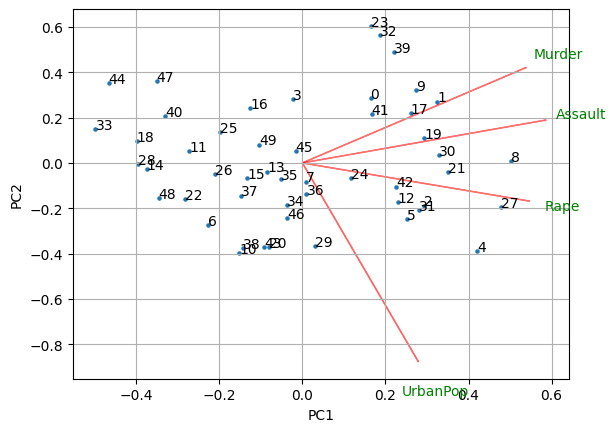

In [229]:
biplot(X_std_trans[:,0:2],np.transpose(std_pca.components_[0:2, :]),list(labels))
plt.show()

- We see that the standardised data results in far more variables being utilised to explain the variance, as the large numbers no longer dominate it. 
- We also see that the the different features have similar magnitudes. 

- **Cities such as Tennessee[41], South Caronlina[39], New Mexico[30], Colorado[5], Maryland[19] are all clustered together within the top right hand of the graph. Exactly where the three features for Murder, Assault and Rape project the data into that direction.**

- **Cities such as North Dakota[33],Maine[18], Wisconsin[48],South Dakato[40], Vermout[44] are at almost polar opposites to the cities where the features point. This suggests that they are low crime areas.**

- The first Principal component does not seem to seperate the features too much. This is not surprising given that they are all positively correlated with each other with Murder, Rape and Assualt all contributing roughly the same amount towards explaining it. 
    - With these three variables dominating PC1, this suggests that PC1 summariese which cities have the highest levels of these crimes, compared to other cities.
    - This seems to suggest that Murder, Rape and Assault all go together and all occur in similar environments (clusters).



- The second principal component seems to seperate the features (3 to 1).
- The variable with the largest positive holding is Urban Populations, with a considerably a larger positive holding for the other three variables.
    - Urban Population does have the highest contribution to PC2 and the lowest to PC1. 
        - **This could be PC2 summarises as whether a city is in an urban area or not.**
            - Following on, we expect there to be less crime in Urban areas compared to non-urban areas.


In [230]:
# Feature importance

pc1 = abs( std_pca.components_[0] ) #components x features - access at index 0 to get the first component
pc2 = abs( std_pca.components_[1] )

feat_df = pd.DataFrame()
feat_df["Features"] = list(labels)
feat_df["PC1 Importance"] = pc1
feat_df["PC2 Importance"] = pc2
feat_df

,Features,PC1 Importance,PC2 Importance
0,Murder,0.536,0.418
1,Assault,0.583,0.188
2,UrbanPop,0.278,0.873
3,Rape,0.543,0.167


- Inspecting the feature importance now, we see that most of the variables contribute fairly evenly, with only some with low importance.
- For the first principle component: Rape, Murder and Assualt all contribute fairly evenly with now UrbanPop contributing the lowest. 
- For the second principle component: UrbanPop still contributes the most, but now, contributions from Murder and Rape have exchanged with Murder contributing the second highest and Rape now the lowest. 
 - The positioning/rank of Assualt hasn't changed.

Text(0.5, 1.0, 'Cumulative Explained Variance')

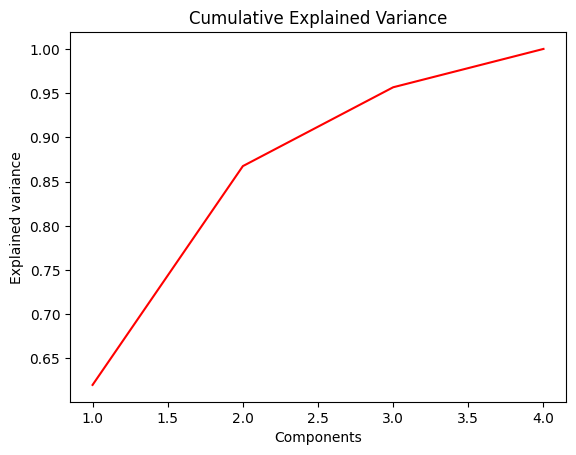

In [231]:
# Cumulative variance plot
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(std_pca.explained_variance_ratio_ )+1),
         np.cumsum(std_pca.explained_variance_ratio_),
         c='red')
plt.title("Cumulative Explained Variance")

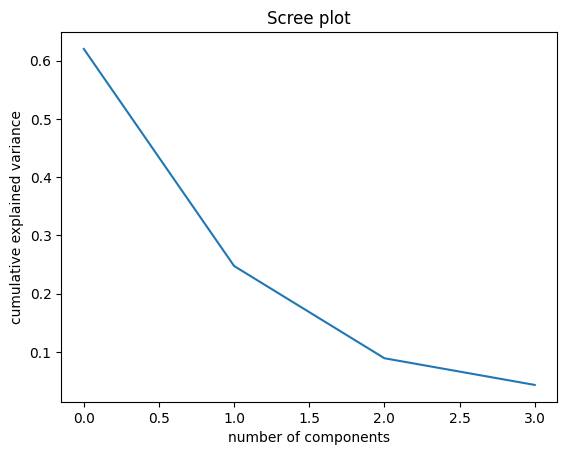

In [232]:
# Scree plot
plt.plot(std_pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("Scree plot")
plt.show()

- The first 3 principal components together explain around 95% of the variance. 
- We can therefore use them to perform cluster analysis. 
- This is what we refer to as dimensionality reduction. 
    - We began with 4 variables and now we have 3 variables explaining most of the variability. 

In [233]:
pca_df = pd.DataFrame(X_std_trans[:,0:3], index = data.index)
pca_df.head()

,0,1,2
City,,,
Alabama,0.986,1.133,-0.444
Alaska,1.950,1.073,2.040
Arizona,1.763,-0.746,0.055
Arkansas,-0.141,1.120,0.115
California,2.524,-1.543,0.599


In [234]:
# End of PCA

---
---
---
---

---
---
---
---

## Hierarchical clustering

- **(2) You are also required to do an application of two clustering techniques and
an analysis of the clusters they generate. Try and see if you can find anything
common within each cluster that has been found.**

In [246]:
# From the notebook

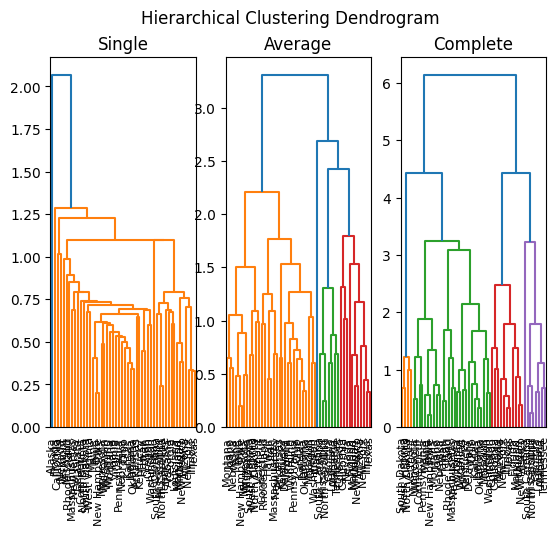

In [247]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(pca_df)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Hierarchical Clustering Dendrogram')
ax1.set_title("Single")
dendrogram(linkage(pca_df, method='single'), labels=pca_df.index, ax=ax1) #change method: eg. single, average, complete...
ax2.set_title("Average")
dendrogram(linkage(pca_df, method='average'), labels=pca_df.index, ax=ax2)
ax3.set_title("Complete")
dendrogram(linkage(pca_df, method='complete'), labels=pca_df.index, ax=ax3)
plt.show()

- From the dendrograms above, the complete linkage method creates the most balanced dispersion of clusters and will therefore be the method of choice for the rest of this analysis. A clearer dendrogram for the complete linkage method is shown below.
- The dispersion seems to split the cities into two clusters.

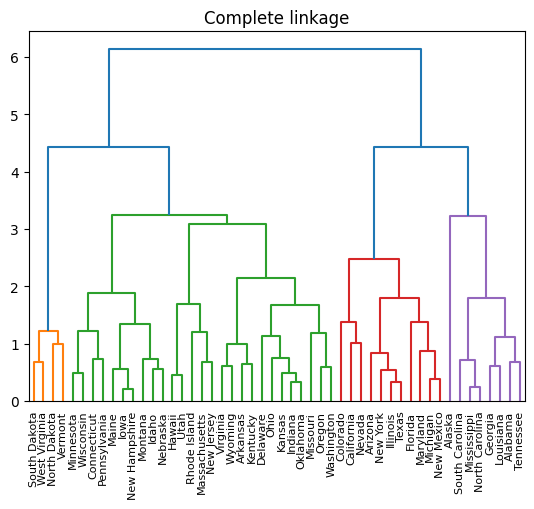

In [248]:
plt.title("Complete linkage")
dendrogram(linkage(pca_df, method='complete'), labels=pca_df.index)
plt.show()

- With k=2, the clusters are of size 19 and 31 respectively. 

- Within the purple cluster (with a height of 3) and the red cluster (with a height of 2.5) contains the cities such as Tennessee[41], South Caronlina[39], New Mexico[30], Colorado[5], Maryland[19]. These are the same cities that we mentioned early that are high crime (assualt, rape, murder) areas which we expect to cluster together.

- Within the yellow and pale green clusters you havceities such as North Dakota[33],Maine[18], Wisconsin[48],South Dakato[40], Vermout[44]. These are the same cities that we mentioned early that are low crime (assualt, rape, murder) areas which we expect to cluster together.

- **This divide closely mimics what we saw in PCA.**

### K-means clustering

- K-means is a very popular clustering partitioning algorithm that is fast and efficient and scales well for large datasets. It is an iterative process, so observations can switch between clusters while the algorithm runs until it converges at a local optimum. This method is not robust when it comes to noise data and outliers and is not suitable for clusters with non-convex shapes. 
    - Another drawback with K-means is the necessity of specifying K in advance.

- For our analysis, it seems that the shape of clusters is likely to be regular based on the PCA biplot. K will be set to 2. A visualisation of the clusters is shown in the figure below.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


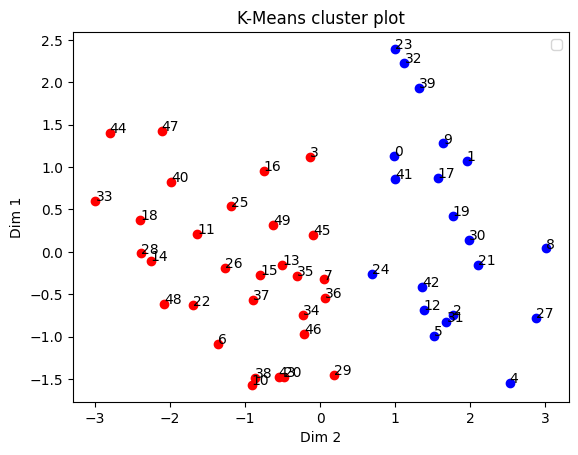

In [251]:
from sklearn.cluster import KMeans

# We extract the first two components
x = X_std_trans[:,0]
y = X_std_trans[:,1]

# Fit k-means
k=2
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(pca_df)
cent = kmeans.cluster_centers_

# Plot clusters
fig, ax = plt.subplots()
colours = 'rbgy'
for i in range(0,k):
    ax.scatter(x[cluster_labels == i],y[cluster_labels == i],c = colours[i]) 

for i in range(0,len(x)):
        txt = countries[i]
        ax.annotate(txt, (x[i], y[i]))
ax.set_title("K-Means cluster plot")
ax.set_xlabel("Dim 2")
ax.set_ylabel("Dim 1")
ax.legend()

- **This divide uncannily mirrors the Principle component biplot that we saw earlier**
- Choosing to specify **two** clusters goes to show the previous divide seen the PC biplot between cities on the left hand side, vs. those on the right. 

In [133]:
# Groups - translate to readable names
clusters = pd.DataFrame()


group0_indices = np.argwhere(cluster_labels==0).transpose()[0]
group1_indices = np.argwhere(cluster_labels==1).transpose()[0]

#cities = data.index

group0 = np.array(cities)[group0_indices]
group1 = np.array(cities)[group1_indices]

print(group0)
print(group1)

['Arkansas' 'Connecticut' 'Delaware' 'Hawaii' 'Idaho' 'Indiana' 'Iowa'
 'Kansas' 'Kentucky' 'Maine' 'Massachusetts' 'Minnesota' 'Montana'
 'Nebraska' 'New Hampshire' 'New Jersey' 'North Dakota' 'Ohio' 'Oklahoma'
 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Dakota' 'Utah' 'Vermont'
 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']
['Alabama' 'Alaska' 'Arizona' 'California' 'Colorado' 'Florida' 'Georgia'
 'Illinois' 'Louisiana' 'Maryland' 'Michigan' 'Mississippi' 'Missouri'
 'Nevada' 'New Mexico' 'New York' 'North Carolina' 'South Carolina'
 'Tennessee' 'Texas']


- Explain this:
 - These are two groups/clusters that overlap with the divide that we saw above in the PC Biplot graph.

- North Dakota[33],Maine[18], Wisconsin[48],South Dakato[40], Vermout[44] all being in group 0.
- Tennessee[41], South Caronlina[39], New Mexico[30], Colorado[5], Maryland[19] all being in group 1.